In [141]:
import numpy as np
import pandas as pd
from scipy.signal import firwin, lfilter
from scipy.signal import butter, filtfilt
import pywt
import matplotlib.pyplot as plt

In [142]:
reposo_data = pd.read_csv('C:/Users/claro/Documents/OpenSignals (r)evolution/temp/Jhoani/Reposo.txt', sep='\t', comment='#', header=None)
flexion_data = pd.read_csv('C:/Users/claro/Documents/OpenSignals (r)evolution/temp/Jhoani/Flexion1.txt', sep='\t', comment='#', header=None)


### Filtro FIR

In [143]:
#Filtro FIR
def apply_fir_filter(emg_signal, sampling_rate, cutoff_hz=50.0, numtaps=101):
    nyquist_rate = sampling_rate / 2.0
    fir_coeff = firwin(numtaps, cutoff_hz / nyquist_rate)
    filtered_signal = lfilter(fir_coeff, 1.0, emg_signal)
    return filtered_signal

sampling_rate = 1000

reposo_emg = reposo_data[5].values
flexion_emg = flexion_data[5].values

In [144]:
filtered_reposo_emg_fir = apply_fir_filter(reposo_emg, sampling_rate)
filtered_flexion_emg_fir = apply_fir_filter(flexion_emg, sampling_rate)

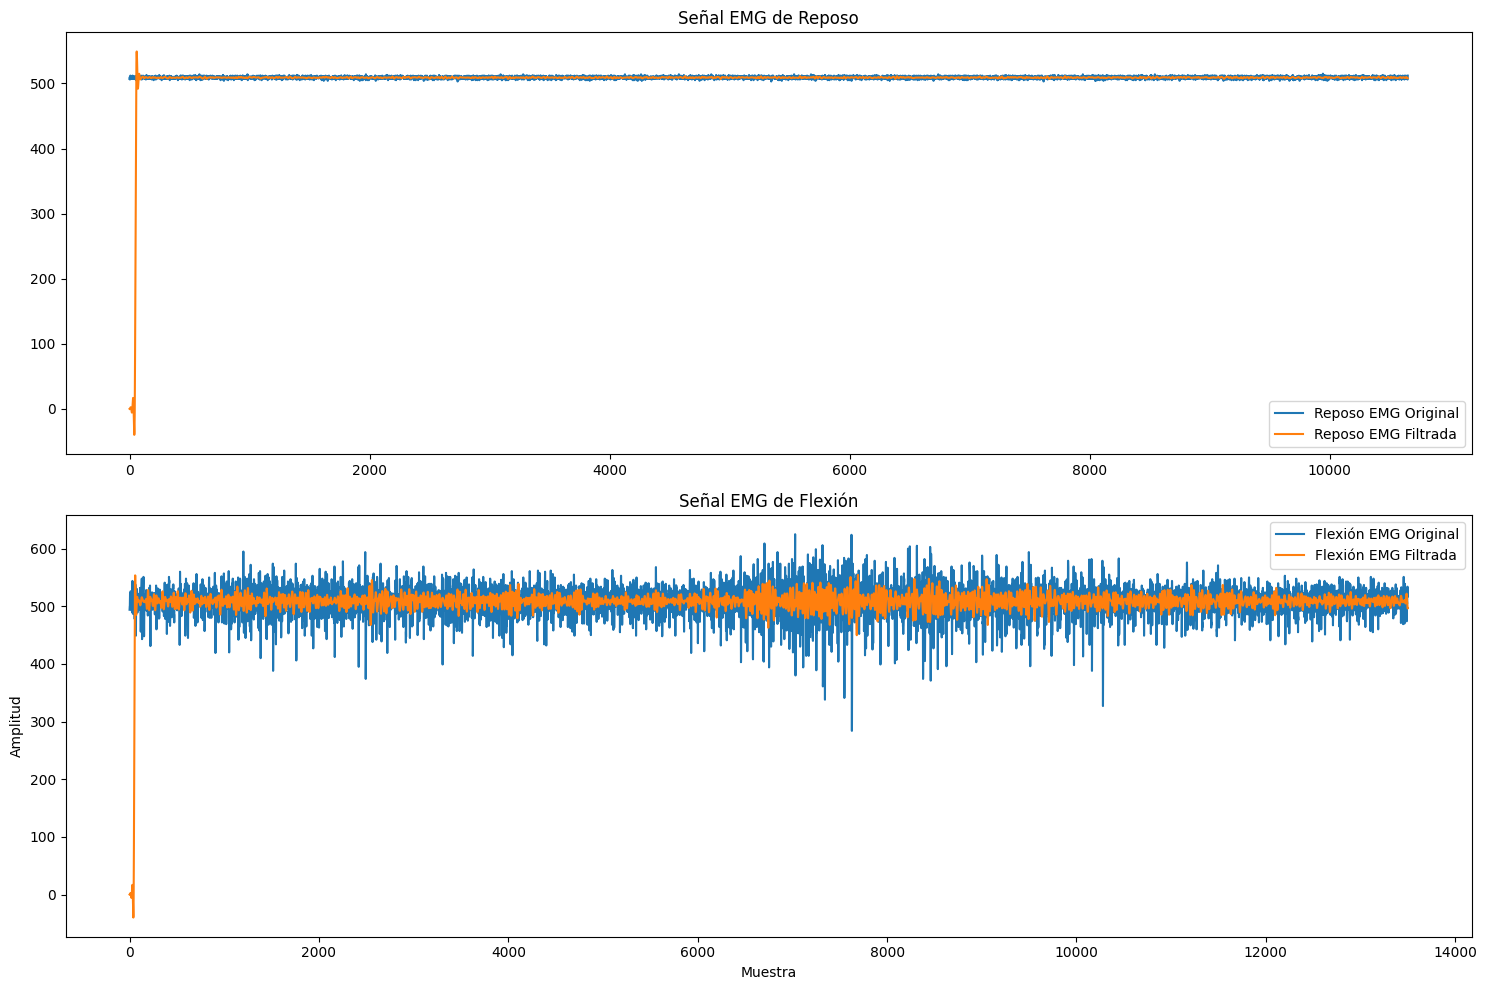

In [145]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(reposo_emg, label='Reposo EMG Original')
plt.plot(filtered_reposo_emg_fir, label='Reposo EMG Filtrada')
plt.legend()
plt.title('Señal EMG de Reposo')

plt.subplot(2, 1, 2)
plt.plot(flexion_emg, label='Flexión EMG Original')
plt.plot(filtered_flexion_emg_fir, label='Flexión EMG Filtrada')
plt.legend()
plt.title('Señal EMG de Flexión')

plt.xlabel('Muestra')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

### Filtro IIR

In [146]:
reposo_data = pd.read_csv('C:/Users/claro/Documents/OpenSignals (r)evolution/temp/Jhoani/Reposo.txt', sep='\t', comment='#', header=None)
flexion_data = pd.read_csv('C:/Users/claro/Documents/OpenSignals (r)evolution/temp/Jhoani/Flexion1.txt', sep='\t', comment='#', header=None)

In [147]:
def apply_iir_filter(emg_signal, sampling_rate, cutoff_hz=50.0, order=4):
    nyquist_rate = sampling_rate / 2.0
    b, a = butter(order, cutoff_hz / nyquist_rate, btype='low')
    filtered_signal = filtfilt(b, a, emg_signal)
    return filtered_signal

In [148]:
sampling_rate = 1000  
reposo_emg = reposo_data[5].values
flexion_emg = flexion_data[5].values


In [149]:
filtered_reposo_emg_iir = apply_iir_filter(reposo_emg, sampling_rate)
filtered_flexion_emg_iir = apply_iir_filter(flexion_emg, sampling_rate)

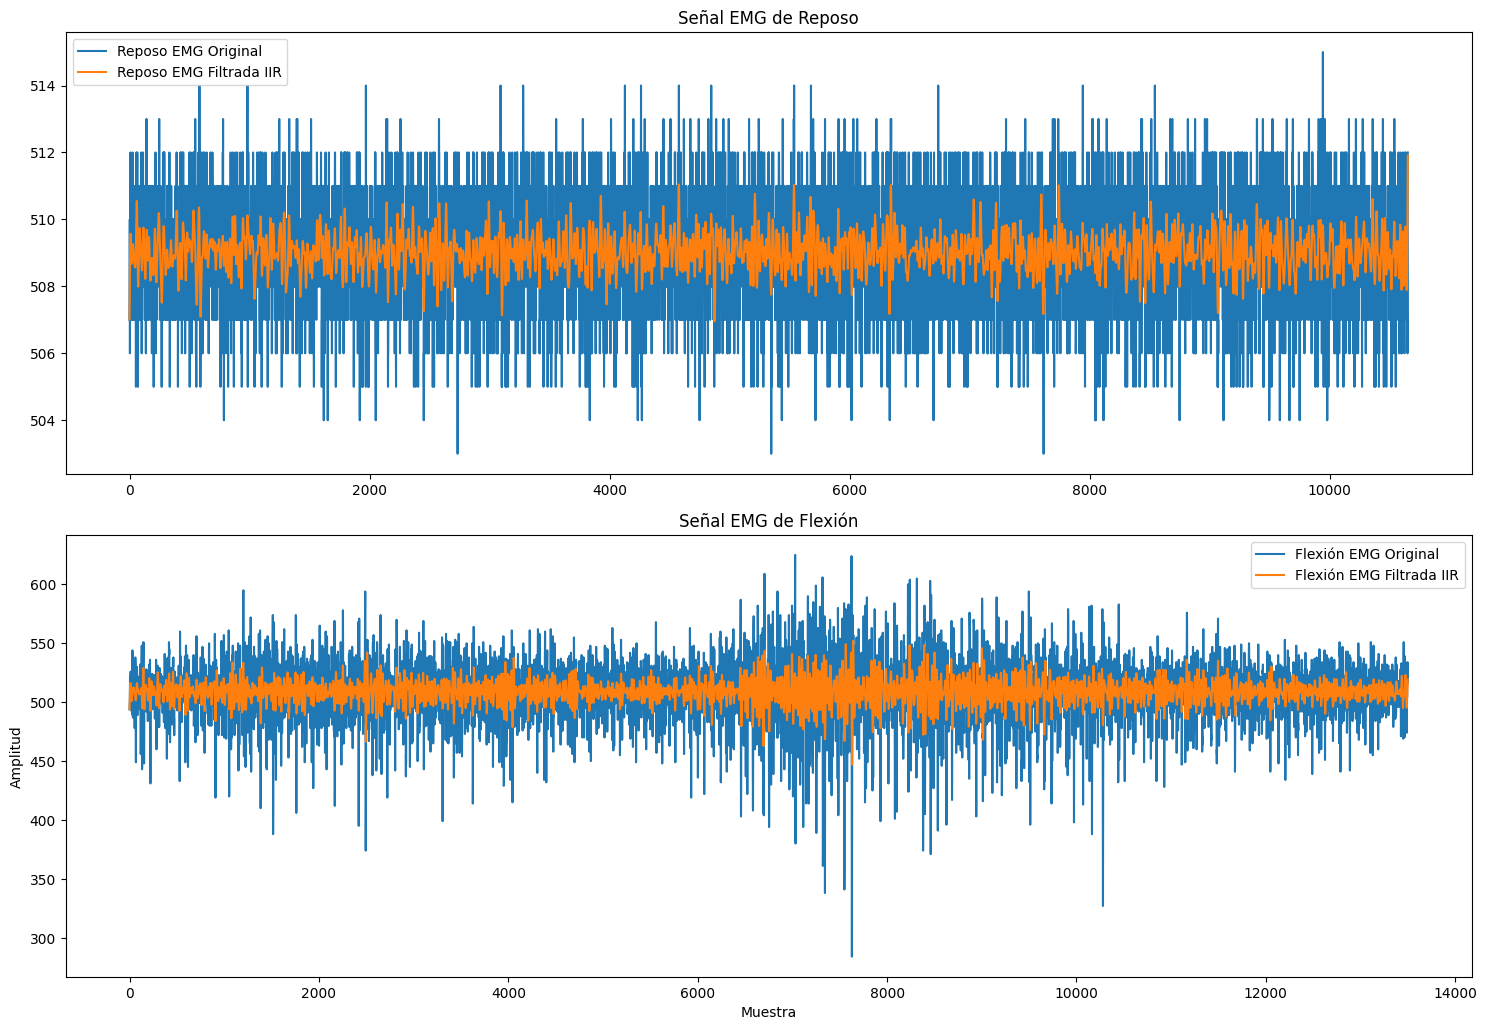

In [150]:
plt.figure(figsize=(15, 15))

plt.subplot(3, 1, 1)
plt.plot(reposo_emg, label='Reposo EMG Original')
plt.plot(filtered_reposo_emg_iir, label='Reposo EMG Filtrada IIR')
plt.legend()
plt.title('Señal EMG de Reposo')

plt.subplot(3, 1, 2)
plt.plot(flexion_emg, label='Flexión EMG Original')
plt.plot(filtered_flexion_emg_iir, label='Flexión EMG Filtrada IIR')
plt.legend()
plt.title('Señal EMG de Flexión')

plt.xlabel('Muestra')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

### Filtro Wavelet

In [151]:
reposo_data = pd.read_csv('C:/Users/claro/Documents/OpenSignals (r)evolution/temp/Jhoani/Reposo.txt', sep='\t', comment='#', header=None)
flexion_data = pd.read_csv('C:/Users/claro/Documents/OpenSignals (r)evolution/temp/Jhoani/Flexion1.txt', sep='\t', comment='#', header=None)

In [152]:
def apply_wavelet_filter(emg_signal, wavelet='db4', level=3, mode='soft'):
    coeffs = pywt.wavedec(emg_signal, wavelet, level=level)
    threshold = np.sqrt(2 * np.log(len(emg_signal))) * np.median(np.abs(coeffs[-level]) / 0.6745)
    new_coeffs = list(map(lambda x: pywt.threshold(x, threshold, mode=mode), coeffs))
    filtered_signal = pywt.waverec(new_coeffs, wavelet)
    return filtered_signal

In [153]:
sampling_rate = 1000 
reposo_emg = reposo_data[5].values
flexion_emg = flexion_data[5].values

In [154]:
filtered_reposo_emg_wavelet = apply_wavelet_filter(reposo_emg)
filtered_flexion_emg_wavelet = apply_wavelet_filter(flexion_emg)

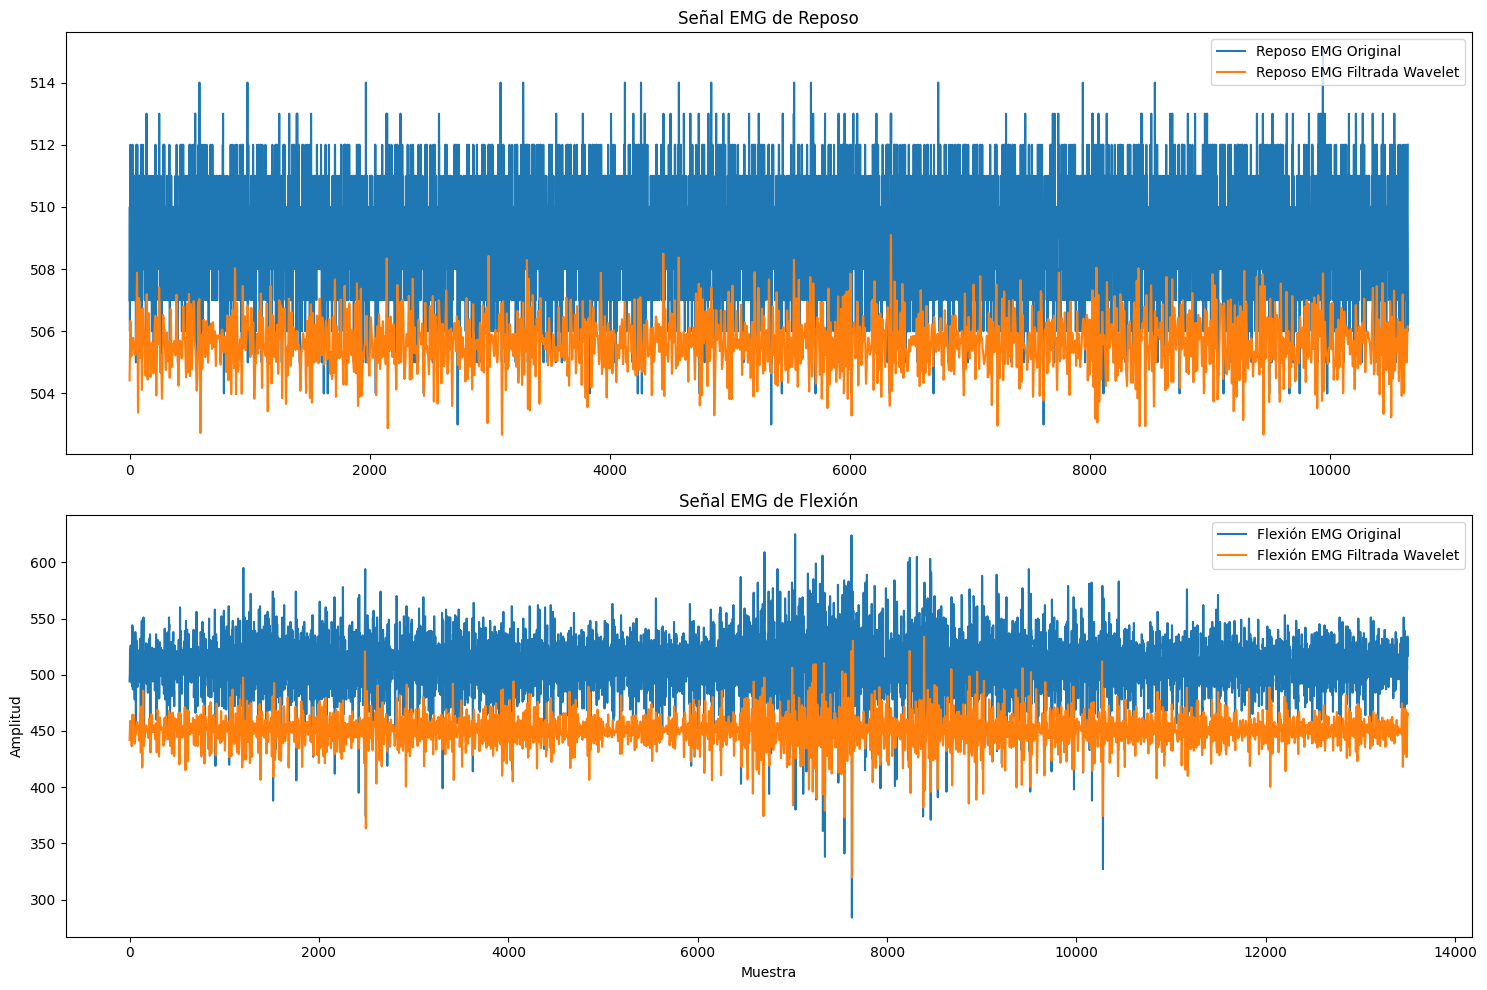

In [155]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 1, 1)
plt.plot(reposo_emg, label='Reposo EMG Original')
plt.plot(filtered_reposo_emg_wavelet, label='Reposo EMG Filtrada Wavelet')
plt.legend()
plt.title('Señal EMG de Reposo')

plt.subplot(2, 1, 2)
plt.plot(flexion_emg, label='Flexión EMG Original')
plt.plot(filtered_flexion_emg_wavelet, label='Flexión EMG Filtrada Wavelet')
plt.legend()
plt.title('Señal EMG de Flexión')

plt.xlabel('Muestra')
plt.ylabel('Amplitud')

plt.tight_layout()
plt.show()

### Calcular el SNR

El SNR servirá para determinar cual es el filtro más óptimo

In [156]:
def calculate_snr(original_signal, filtered_signal):
    signal_power = np.mean(original_signal ** 2)
    noise_power = np.mean((original_signal - filtered_signal) ** 2)
    snr = 10 * np.log10(signal_power / noise_power)
    return snr

In [157]:
snr_reposo_fir = calculate_snr(reposo_emg, filtered_reposo_emg_fir)
snr_flexion_fir = calculate_snr(flexion_emg, filtered_flexion_emg_fir)

snr_reposo_iir = calculate_snr(reposo_emg, filtered_reposo_emg_iir)
snr_flexion_iir = calculate_snr(flexion_emg, filtered_flexion_emg_iir)

snr_reposo_wavelet = calculate_snr(reposo_emg, filtered_reposo_emg_wavelet)
snr_flexion_wavelet = calculate_snr(flexion_emg, filtered_flexion_emg_wavelet)

In [158]:
snr_results = {
    'Reposo': {
        'FIR': snr_reposo_fir,
        'IIR': snr_reposo_iir,
        'Wavelet': snr_reposo_wavelet,
    },
    'Flexion': {
        'FIR': snr_flexion_fir,
        'IIR': snr_flexion_iir,
        'Wavelet': snr_flexion_wavelet,
    }
}
print(pd.DataFrame(snr_results))


            Reposo    Flexion
FIR      23.382454  21.897949
IIR      50.824073  27.707349
Wavelet  42.810184  18.347009
